In [1]:
#----------------------------------
# Final project - Machine Learning
#----------------------------------
#Ofer Avioz, 212052385

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Q1 - import dataset
DataSet = pd.read_csv('dataset.csv',header=None)
DataSet.index = np.arange(1, len(DataSet) + 1)
lastColumn = DataSet.columns[-1]
Y = DataSet[lastColumn].map({'A': 0, 'B': 1})

X_all = DataSet.iloc[:, :-1].to_numpy()
X_all = np.column_stack((np.ones(X_all.shape[0]), X_all))
Y_all = Y.to_numpy().reshape(-1, 1)
#Check the results - from line 98 its B so it should be 1
print("Line 97: ", Y.loc[97])
print("Line 98: ", Y.loc[98])
print("Number of samples in X_all:", X_all.shape[0])
print("Number of features in X_all:", X_all.shape[1])
print("Shape of Y_all:", Y_all.shape)

Line 97:  0
Line 98:  1
Number of samples in X_all: 208
Number of features in X_all: 61
Shape of Y_all: (208, 1)


In [3]:
#Q2 - split dataset to train and test
#The percentage split i chose for train and test sets is 80% and 20%
N = X_all.shape[0]
N1 = int(0.8 * N)
N2 = N - N1

np.random.seed(42) #I know its a software engineering joke, but I liked it :)
#To check if there is overlap between train and test sets
overlap_found = True
while overlap_found:
    setMix = np.arange(N)
    np.random.shuffle(setMix)
    trainSet_idxs = setMix[:N1]
    testSet_idxs = setMix[N1:]
    train_pairs = {(tuple(X_all[i]), Y_all[i,0]) for i in trainSet_idxs}
    test_pairs = {(tuple(X_all[i]), Y_all[i,0]) for i in testSet_idxs}
    overlap_found = not train_pairs.isdisjoint(test_pairs)

X_train = X_all[trainSet_idxs]
Y_train = Y_all[trainSet_idxs]

X_test = X_all[testSet_idxs]
Y_test = Y_all[testSet_idxs]

Dtrain = list(zip(X_train, Y_train))
Dtest = list(zip(X_test, Y_test))
#Check the results
print("Train size:", len(Y_train))
print("Test size:", len(Y_test))
print("Overlap?", overlap_found)

Train size: 166
Test size: 42
Overlap? False


In [4]:
#Q3 - GD for logistic regression
def sigma(z):
    z = np.clip(z, -500, 500)  #To prevent overflow in exp
    return 1 / (1 + np.exp(-z))

def lossFunction(X, Y, w):
    z = X @ w
    Y = Y.reshape(-1, 1) #To ensure y is column
    p = sigma(z)
    p = np.clip(p, 1e-12, 1-1e-12) #To prevent log(0)
    return -np.mean(Y * np.log(p) + (1 - Y) * np.log(1 - p))

def GD_LogisticRegression(X, Y, alpha, iterations, w=None):
    X = np.asarray(X, float)
    Y = np.asarray(Y, float).reshape(-1, 1) #To ensure Y is column
    #I chose to initialize w to zeros, but it can be changed to any other value
    #I wrote about the reason why in my PDF
    if w is None:
        w = np.zeros((X.shape[1], 1))
    losses = []
    accuracies = []
    for i in range(iterations):
        z = X @ w
        Y_pred = sigma(z)
        grad = (X.T @ (Y-Y_pred)) / len(Y)
        w = w + alpha * grad
        #Keep loss data
        loss = lossFunction(X, Y, w)
        losses.append(loss)
        #Keep accuracy data
        Y_class = predict(X, w)
        acc = accuracy(Y, Y_class)
        accuracies.append(acc)
    return w, losses, accuracies

def predict(X, w):
    z = X @ w
    Y_pred = sigma(z)
    return (Y_pred > 0.5).astype(int)

def accuracy(Y_true, Y_pred):
    return np.mean(Y_true.reshape(-1) == Y_pred.reshape(-1))

#I wanted to return the loss, w, and accuracy in the GD_LogisticRegression function so i could plot them later and use them in the rest of the code.


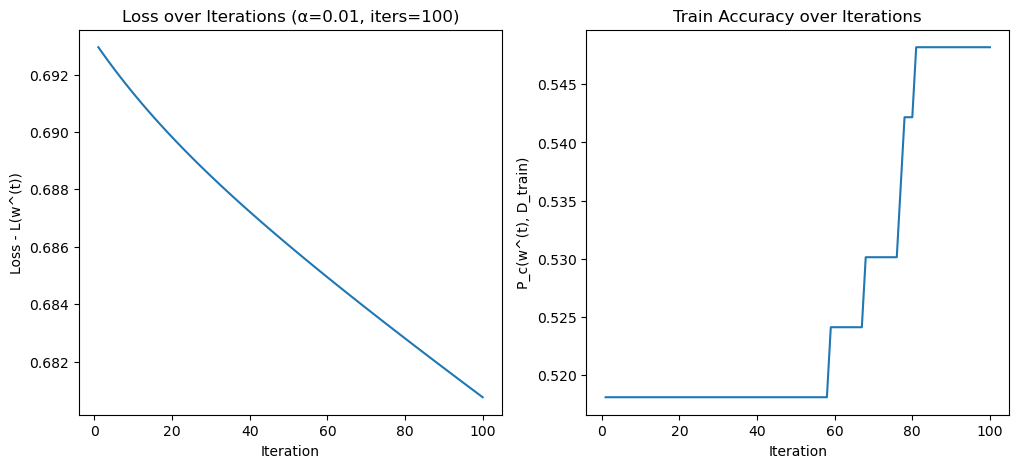

Train accuracy: 0.548
Test accuracy: 0.619


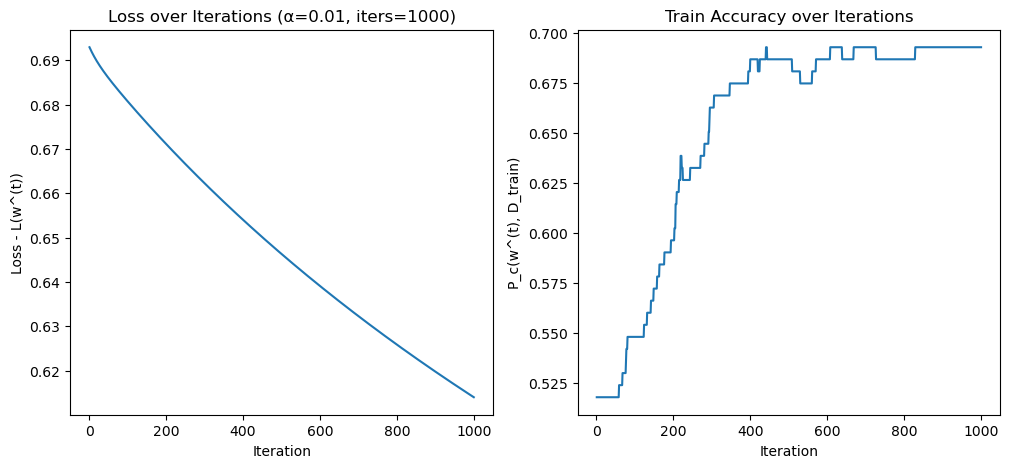

Train accuracy: 0.693
Test accuracy: 0.714


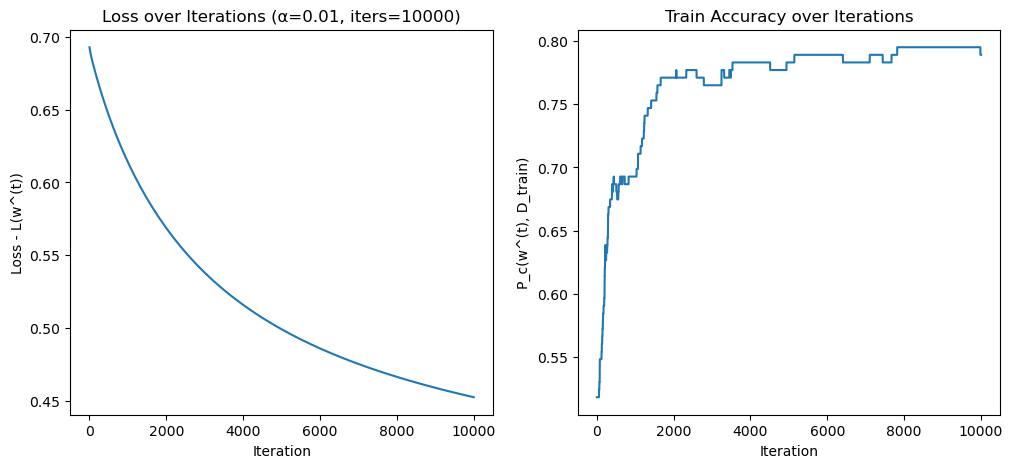

Train accuracy: 0.789
Test accuracy: 0.786


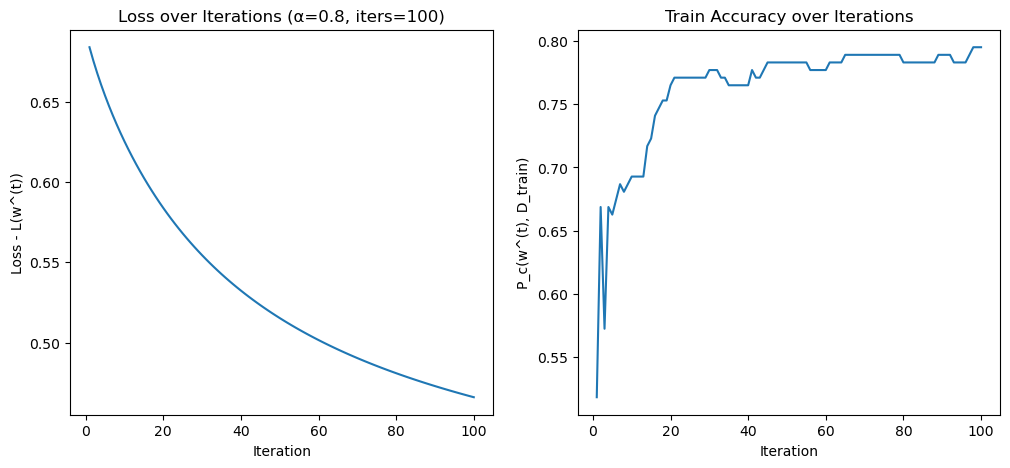

Train accuracy: 0.795
Test accuracy: 0.786


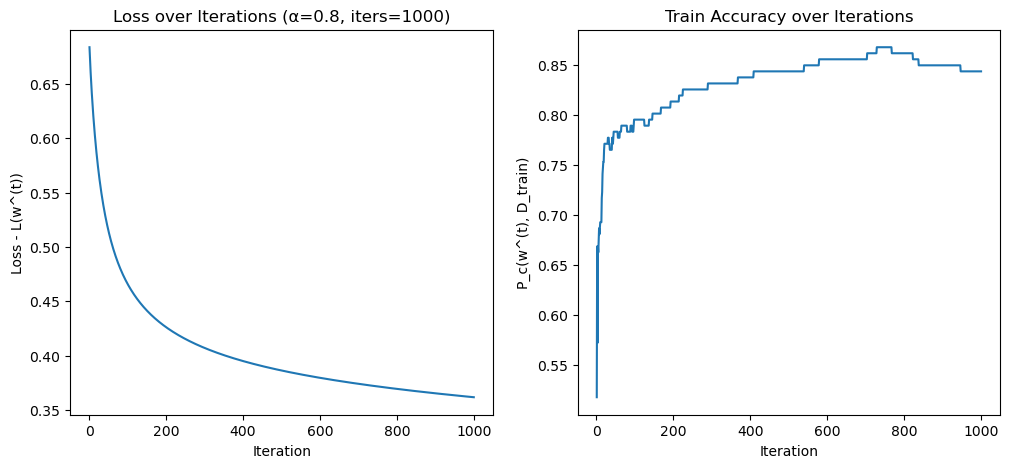

Train accuracy: 0.843
Test accuracy: 0.833


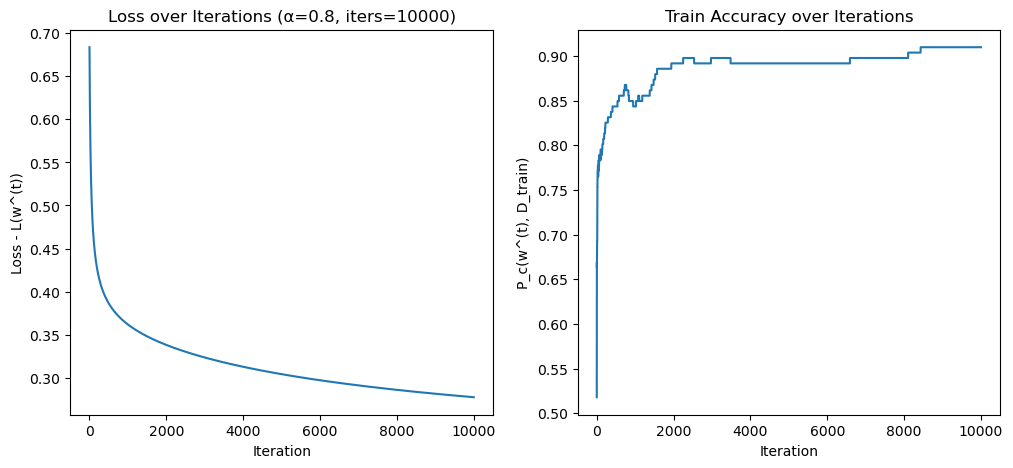

Train accuracy: 0.910
Test accuracy: 0.810


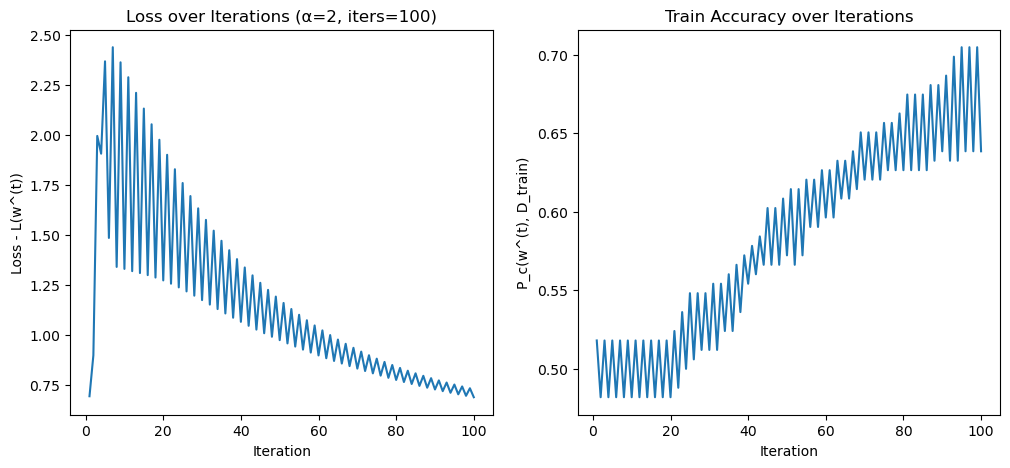

Train accuracy: 0.639
Test accuracy: 0.571


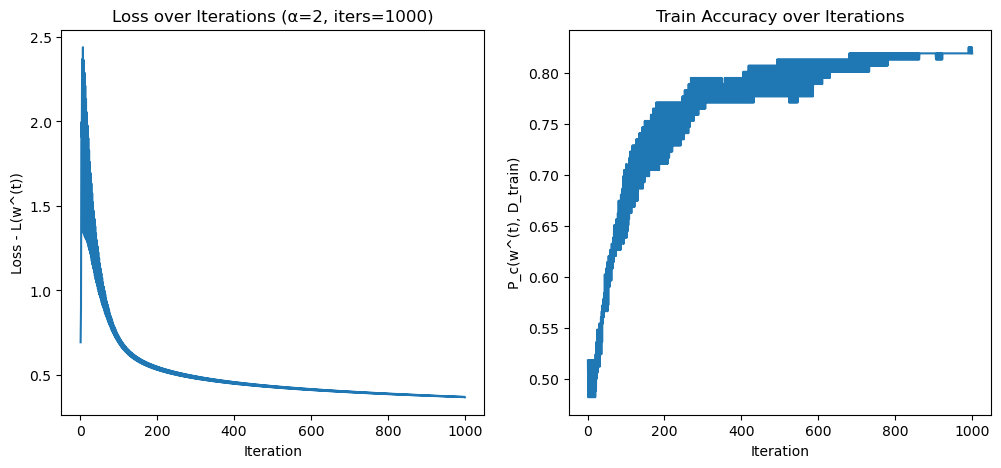

Train accuracy: 0.819
Test accuracy: 0.786


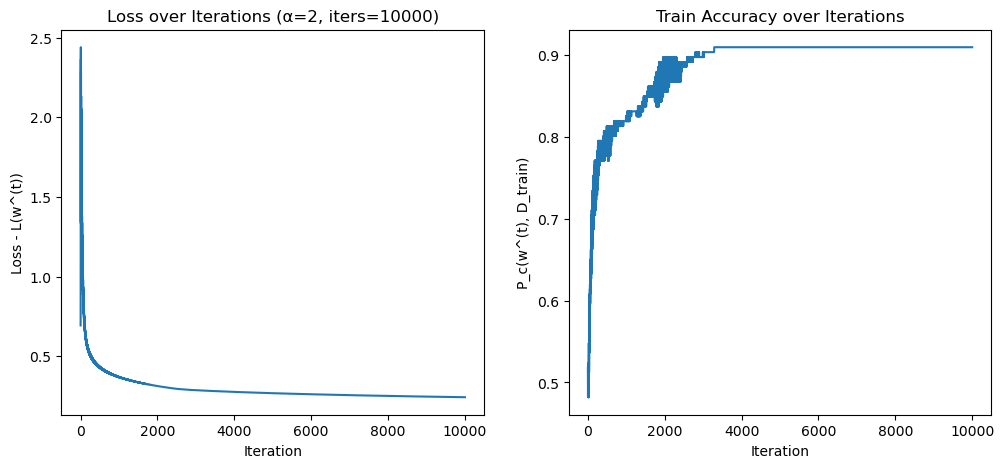

Train accuracy: 0.910
Test accuracy: 0.810


In [5]:
#Q4 - Set training parameters and test the GD_LogisticRegression function
#Part 1 - loss and accuracy measurements

#I chose some parameters for the training so i can see how the model behaves, next step is to understand by plotting the results what is the best combination of parameters that will give me the best results im looking for.
#For me, after testing different parameters, i reduced the range of alpha to [0.01, 0.8, 2] only because my initial range was not enough to see the differences in the results or in some other cases was too high and gave me bad results...
#The iterations part was a little less tricky because i immediately saw that the more i train the model - the better are the results (but in most cases not necessarily the most efficient)

def train_and_plot(X_train, Y_train, X_test, Y_test, alpha, iterations):
    w, losses, accuracies = GD_LogisticRegression(X_train, Y_train, alpha, iterations)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(range(1, len(losses)+1), losses)
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Loss - L(w^(t))')
    axs[0].set_title(f'Loss over Iterations (α={alpha}, iters={iterations})')

    axs[1].plot(range(1, len(accuracies)+1), accuracies)
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('P_c(w^(t), D_train)')
    axs[1].set_title('Train Accuracy over Iterations')

    plt.show()

    Y_train_pred = predict(X_train, w)
    Y_test_pred = predict(X_test, w)
    #The accuracy i was asked to calculate for now based on the iterations i chose
    #In the next part i will find the most optimal P value for my model and calculate the accuracy of training set based on that!
    print(f"Train accuracy: {accuracy(Y_train, Y_train_pred):.3f}")
    #Just for me so i can see the differences between them
    print(f"Test accuracy: {accuracy(Y_test, Y_test_pred):.3f}")

for alpha in [0.01, 0.8, 2]:
    for iters in [100, 1000, 10000]:
        train_and_plot(X_train, Y_train, X_test, Y_test, alpha, iters)

P = 686
P_c(w^(P), D_test) = 0.833
After finding P - P_c(w^(t), D_train) = 0.855


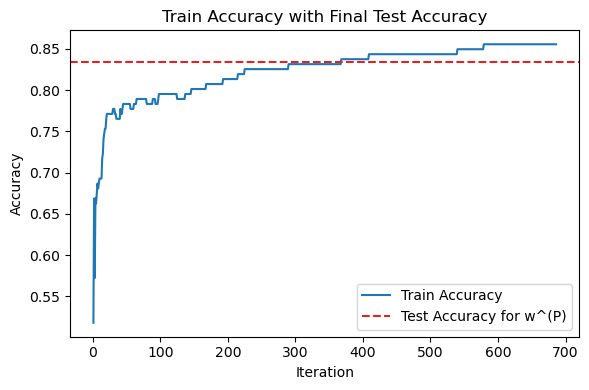

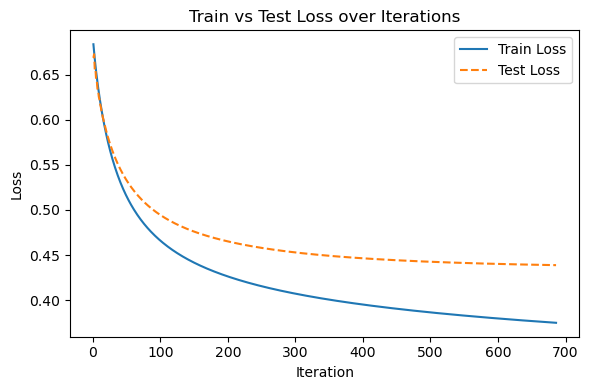

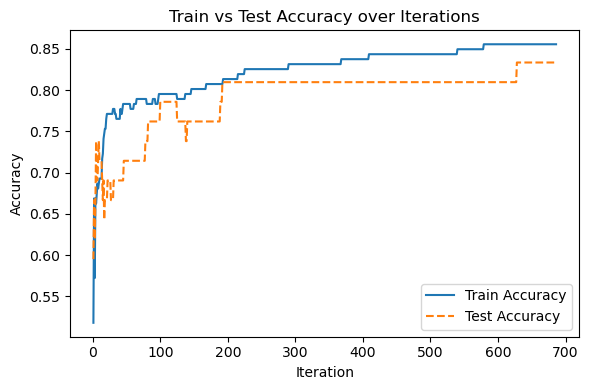

In [6]:
#Part 2 - accuracy on test set

#This functions helps me find the most optimal P value for my model, P represents the number of iterations that the model will train on the training set until GD stops and get stable.

def find_P_via_GD_Stop(X_train, Y_train, X_test, Y_test, alpha, max_iterations, tol, patience):

    w = np.zeros((X_train.shape[1], 1))
    losses, accuracies = [], []
    stable = 0

    for P in range(1, max_iterations + 1):
        w_prev = w.copy()

        w, l1, a1 = GD_LogisticRegression(X_train, Y_train, alpha, 1, w)

        losses.append(float(l1[-1]))
        accuracies.append(float(a1[-1]))
        #Check when the model is stable and Gradient Descent stops
        dw = np.linalg.norm(w - w_prev)
        base = max(1.0, float(np.linalg.norm(w_prev)))
        if (dw / base) < tol:
            stable += 1
            if stable >= patience:
                break
        else:
            stable = 0

    Y_test_pred = predict(X_test, w)
    Pc_test = accuracy(Y_test, Y_test_pred)
    P = len(losses)

    return w, P, Pc_test, losses, accuracies

Wp, P, Pc_test, losses, accuracies = find_P_via_GD_Stop(X_train, Y_train, X_test, Y_test, alpha=0.8, max_iterations=20000, tol=7e-4, patience=20)

print(f"P = {P}")
print(f"P_c(w^(P), D_test) = {Pc_test:.3f}")
print("After finding P - P_c(w^(t), D_train) = {:.3f}".format(accuracy(Y_train, predict(X_train, Wp))))

#First plot - train accuracy over iterations + test accuracy that was calculated for w^(P)
plt.figure(figsize=(6, 4))
plt.plot(range(1, P+1), accuracies, label='Train Accuracy')
plt.axhline(y=Pc_test, linestyle='--', color='tab:red', label='Test Accuracy for w^(P)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train Accuracy with Final Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#Plotting the whole process and checking the differences between train and test sets paths
#Eventually, the test set accuracy is a stable value!
alpha_used = 0.8
w_curve = np.zeros((X_train.shape[1], 1))
loss_tr, loss_te = [], []
acc_tr, acc_te = [], []

for _ in range(P):
    w_curve, l1, a1 = GD_LogisticRegression(X_train, Y_train, alpha_used, 1, w_curve)
    loss_tr.append(float(l1[-1]))
    acc_tr.append(float(a1[-1]))
    loss_te.append(float(lossFunction(X_test, Y_test, w_curve)))
    acc_te.append(float(accuracy(Y_test, predict(X_test, w_curve))))

#Plotting train loss and test loss
plt.figure(figsize=(6, 4))
plt.plot(range(1, P+1), loss_tr, label='Train Loss')
plt.plot(range(1, P+1), loss_te, '--', label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train vs Test Loss over Iterations')
plt.legend()
plt.tight_layout()
plt.show()

#Plotting train accuracy vs test accuracy
plt.figure(figsize=(6, 4))
plt.plot(range(1, P+1), acc_tr, label='Train Accuracy')
plt.plot(range(1, P+1), acc_te, '--', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy over Iterations')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#Part 3 - confusion matrix for train set
def confusion_matrix_binary(Y_true, Y_pred):
    Y_true = Y_true.reshape(-1)
    Y_pred = Y_pred.reshape(-1)
    tp = np.sum((Y_true == 1) & (Y_pred == 1))
    fp = np.sum((Y_true == 0) & (Y_pred == 1))
    fn = np.sum((Y_true == 1) & (Y_pred == 0))
    tn = np.sum((Y_true == 0) & (Y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

w0 = np.zeros((X_train.shape[1], 1))
cm_t0 = confusion_matrix_binary(Y_train, predict(X_train, w0))
alpha_for_cm = 0.8

w_half, _, _ = GD_LogisticRegression(X_train, Y_train, alpha_for_cm, P // 2, w=None)
cm_tHalf = confusion_matrix_binary(Y_train, predict(X_train, w_half))
cm_tP = confusion_matrix_binary(Y_train, predict(X_train, Wp))

print("Train confusion matrix at t = 0 -> (w^(0)):\n", cm_t0)
print("Train confusion matrix at t = P/2 -> (w^(⌊P/2⌋)):\n", cm_tHalf)
print("Train confusion matrix at t = P -> (w^(P)):\n", cm_tP)

Train confusion matrix at t = 0 -> (w^(0)):
 [[ 0  0]
 [86 80]]
Train confusion matrix at t = P/2 -> (w^(⌊P/2⌋)):
 [[76 18]
 [10 62]]
Train confusion matrix at t = P -> (w^(P)):
 [[77 15]
 [ 9 65]]


In [8]:
# Part 4 - confusion matrix for test set
cm_test_P = confusion_matrix_binary(Y_test, predict(X_test, Wp))
#Accuracy calculating over the matrix to check if it is equal to Pc_test
print("Test confusion matrix at t = P (w^(P)):\n", cm_test_P)
TP, FP = cm_test_P[0]
FN, TN = cm_test_P[1]
print(f"accuracy on D_test = {(TN+TP)/len(Y_test):.3f} (should equal Pc_test = {Pc_test:.3f})")

Test confusion matrix at t = P (w^(P)):
 [[19  1]
 [ 6 16]]
accuracy on D_test = 0.833 (should equal Pc_test = 0.833)


     tol  patience     P  acc_train  acc_test
0.000001         2 20000   0.909639  0.833333
0.000001        20 20000   0.909639  0.833333
0.000001       100 20000   0.909639  0.833333
0.000700         2   668   0.855422  0.833333
0.000700        20   686   0.855422  0.833333
0.000700       100   766   0.867470  0.833333
0.010000         2    67   0.789157  0.714286
0.010000        20    85   0.783133  0.761905
0.010000       100   165   0.801205  0.761905


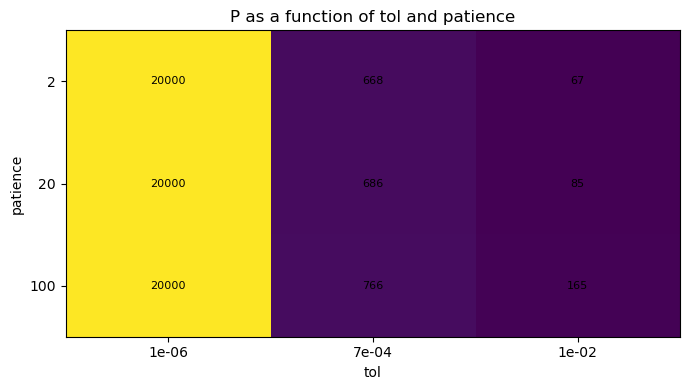

In [9]:
#Simulating how toll and patience affects P
alpha_used = 0.8
max_iters = 20000
tols = [1e-2, 7e-4, 1e-6]
patiences = [2, 20, 100]
rows = []
for tol in tols:
    for pat in patiences:
        Wp_tmp, P_tmp, Pc_tmp, _, _ = find_P_via_GD_Stop(X_train, Y_train, X_test, Y_test,
        alpha=alpha_used, max_iterations=max_iters, tol=tol, patience=pat)
        acc_tr_tmp = float(accuracy(Y_train, predict(X_train, Wp_tmp)))
        rows.append({"tol": tol, "patience": pat,"P": P_tmp, "acc_train": acc_tr_tmp, "acc_test": float(Pc_tmp)})

df = pd.DataFrame(rows)
print(df.sort_values(["tol", "patience"]).to_string(index=False))

#Create pivot table
P_pivot = df.pivot(index="patience", columns="tol", values="P")
acc_test_pivot = df.pivot(index="patience", columns="tol", values="acc_test")

#Create the Heatmap for P
plt.figure(figsize=(7,4))
im = plt.imshow(P_pivot.values, aspect='auto')
plt.xticks(range(len(P_pivot.columns)), [f'{c:.0e}' for c in P_pivot.columns])
plt.yticks(range(len(P_pivot.index)), P_pivot.index)
plt.title('P as a function of tol and patience')
plt.xlabel('tol')
plt.ylabel('patience')
#Fill the heatmap with values
for i in range(len(P_pivot.index)):
    for j in range(len(P_pivot.columns)):
        plt.text(j, i, int(P_pivot.values[i, j]), ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.show()

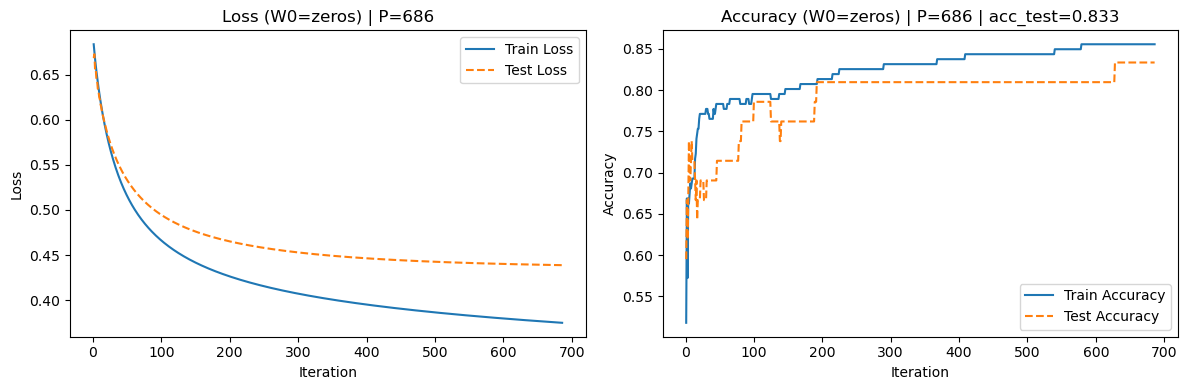

W0=zeros -> P=686, acc_test=0.833, acc_train=0.855


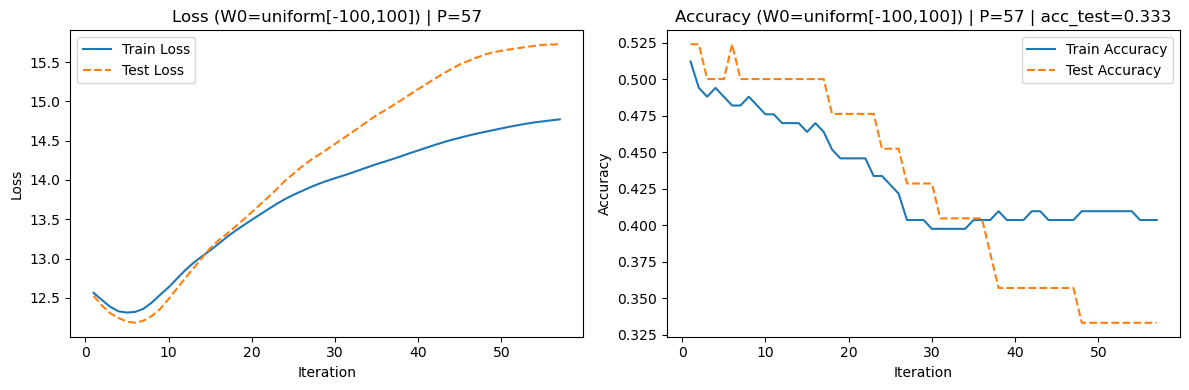

W0=uniform[-100,100] -> P=57, acc_test=0.333, acc_train=0.404


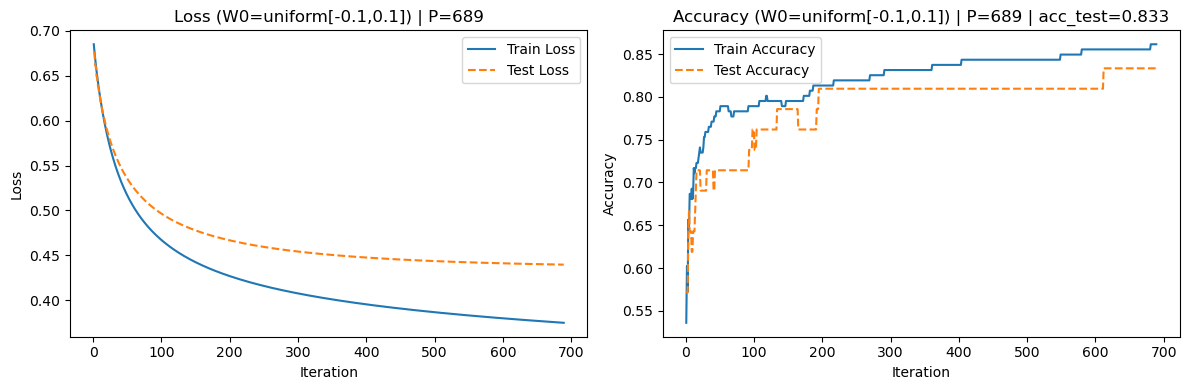

W0=uniform[-0.1,0.1] -> P=689, acc_test=0.833, acc_train=0.861


In [10]:
#Check the influence of different W^(0) initializations on P, loss, and accuracy
alpha_used = 0.8
tol_used = 7e-4
patience_used = 20
max_iters = 20000

d = X_train.shape[1]
rng = np.random.default_rng(123)
K = 100.0 #Big value to see how unstable the model is with different inits

inits = {
    "W0=zeros": np.zeros((d, 1)),
    f"W0=uniform[-{int(K)},{int(K)}]": rng.uniform(-K, K, size=(d, 1)),
    "W0=uniform[-0.1,0.1]": rng.uniform(-0.1, 0.1, size=(d, 1))
}

def run_with_different_W0(w0):
    w = w0.copy().astype(float)
    loss_tr, loss_te, acc_tr, acc_te = [], [], [], []
    stable = 0
    for t in range(1, max_iters + 1):
        w_prev = w.copy()
        w, l1, a1 = GD_LogisticRegression(X_train, Y_train, alpha_used, 1, w)
        loss_tr.append(float(l1[-1]))
        acc_tr.append(float(a1[-1]))
        loss_te.append(float(lossFunction(X_test, Y_test, w)))
        acc_te.append(float(accuracy(Y_test, predict(X_test, w))))
        dw = np.linalg.norm(w - w_prev)
        base = max(1.0, float(np.linalg.norm(w_prev)))
        if (dw / base) < tol_used:
            stable += 1
            if stable >= patience_used:
                break
        else:
            stable = 0
    return t, loss_tr, loss_te, acc_tr, acc_te

for name, w0 in inits.items():
    P_i, loss_tr, loss_te, acc_tr, acc_te = run_with_different_W0(w0)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    it = range(1, P_i + 1)
    #Loss plot
    axs[0].plot(it, loss_tr, label="Train Loss")
    axs[0].plot(it, loss_te, "--", label="Test Loss")
    axs[0].set_title(f"Loss ({name}) | P={P_i}")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("Loss")
    axs[0].legend()

    #Accuracy plot
    axs[1].plot(it, acc_tr, label="Train Accuracy")
    axs[1].plot(it, acc_te, "--", label="Test Accuracy")
    axs[1].set_title(f"Accuracy ({name}) | P={P_i} | acc_test={acc_te[-1]:.3f}")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    print(f"{name} -> P={P_i}, acc_test={acc_te[-1]:.3f}, acc_train={acc_tr[-1]:.3f}")